\newpage

In [50]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### **1. Classification Problem Identification**

Dataset is used from the [Early Stage of Indians Chronic Kidney Disease (CKD)](https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease) project, which comprises data on 250 early-stage CKD patients and 150 healthy controls.

In this assignment, machine learning (ML) techniques have been deployed to predict, diagnose, and treat chronic kidney disease (CKD). 

In [3]:
## Load Dataset
data_url = 'https://archive.ics.uci.edu/static/public/336/data.csv'
df = pd.read_csv(data_url)
df.head(2)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd


In [53]:
# fetch dataset 
chronic_kidney_disease = fetch_ucirepo(id=336) 
# metadata 
print(chronic_kidney_disease.metadata) 

{'uci_id': 336, 'name': 'Chronic Kidney Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/336/data.csv', 'abstract': 'This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 400, 'num_features': 24, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5G020', 'creators': ['L. Rubini', 'P. Soundarapandian', 'P. Eswaran'], 'intro_paper': None, 'additional_info': {'summary': 'We use the following representation to collect the dataset\r\n                        age\t\t-\tage\t\r\n\t\t\tbp\t\t-\tblood pressure\r\n\t\t\tsg\t

In [54]:
# data (as pandas dataframes) 
X = chronic_kidney_disease.data.features 
y = chronic_kidney_disease.data.targets 

In [55]:
# Features
X.head(2)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no
1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,11.3,38.0,6000.0,NaN,no,no,no,good,no,no


In [56]:
# Target
y.head(2)

,class
0,ckd
1,ckd


The classification problem is determining whether a patient has early-stage CKD based on various medical measurements included in the dataset. There are two classes here: Early-stage Indian CKD patients and Healthy patients.

### **2. Variable Transformation**

In [4]:
df.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object

From the dictionary， `sg`, `al`, `su` are Categorical variables. `age`, `bp`, `bgr`, `bu`, `sod`, `pcv`, `wbcc` are Integer variable. `rbc`, `pc`, `pcc`, `ba`, `htn`, `dm`, `cad`, `appet`, `pe`, `ane`, `class` are Binary variables. `sc`,`pot`,`hemo`,and `rbcc` are continuous varibles. Then, we need to transform the data type.

In [8]:
columns_to_convert = ['sg', 'al', 'su']

for col in columns_to_convert:
    df[col] = pd.Categorical(df[col])

In [9]:
for col in columns_to_convert:
    print(df[col].value_counts(normalize=True))

sg
1.02     0.300283
1.01     0.237960
1.025    0.229462
1.015    0.212465
1.005    0.019830
Name: proportion, dtype: float64
al
0.0    0.562147
1.0    0.124294
2.0    0.121469
3.0    0.121469
4.0    0.067797
5.0    0.002825
Name: proportion, dtype: float64
su
0.0    0.826211
2.0    0.051282
3.0    0.039886
1.0    0.037037
4.0    0.037037
5.0    0.008547
Name: proportion, dtype: float64


In general, we do not need to convert binary variables. Since the classification algorithm is sensitive to the scale of the data, we choose to standardize those data under integer and continuous variable.

In [84]:
from sklearn.preprocessing import StandardScaler

#df_scale = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
#df_scale

scale = ['age','bp','bgr','bu','sod','pcv','wbcc','sc','pot','hemo','rbcc']
scaler = StandardScaler()
df[scale] = scaler.fit_transform(df[scale]) 
df.head(2)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,-0.203139,0.258373,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,-0.341498,...,0.569881,-0.206202,0.481295,yes,yes,no,good,no,no,ckd
1,-2.594124,-1.936857,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,-0.098536,-0.818559,NaN,no,no,no,good,no,no,ckd


### **3. Dataset Overview**

In [85]:
df.describe

<bound method NDFrame.describe of           age        bp     sg   al   su     rbc        pc         pcc  \
0   -0.203139  0.258373  1.020  1.0  0.0     NaN    normal  notpresent   
1   -2.594124 -1.936857  1.020  4.0  0.0     NaN    normal  notpresent   
2    0.613295  0.258373  1.010  2.0  3.0  normal    normal  notpresent   
3   -0.203139 -0.473370  1.005  4.0  0.0  normal  abnormal     present   
4   -0.028189  0.258373  1.010  2.0  0.0  normal    normal  notpresent   
..        ...       ...    ...  ...  ...     ...       ...         ...   
395  0.205078  0.258373  1.020  0.0  0.0  normal    normal  notpresent   
396 -0.553039 -0.473370  1.025  0.0  0.0  normal    normal  notpresent   
397 -2.302541  0.258373  1.020  0.0  0.0  normal    normal  notpresent   
398 -2.010957 -1.205114  1.025  0.0  0.0  normal    normal  notpresent   
399  0.380028  0.258373  1.025  0.0  0.0  normal    normal  notpresent   

             ba       bgr  ...       pcv      wbcc      rbcc  htn   dm  cad  

In [10]:
# Observations count
print(df.shape)
# type check
df.dtypes

(400, 25)


age       float64
bp        float64
sg       category
al       category
su       category
rbc        object
pc         object
pcc        object
ba         object
bgr       float64
bu        float64
sc        float64
sod       float64
pot       float64
hemo      float64
pcv       float64
wbcc      float64
rbcc      float64
htn        object
dm         object
cad        object
appet      object
pe         object
ane        object
class      object
dtype: object

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bp'}>,
        <Axes: title={'center': 'bgr'}>],
       [<Axes: title={'center': 'bu'}>, <Axes: title={'center': 'sc'}>,
        <Axes: title={'center': 'sod'}>],
       [<Axes: title={'center': 'pot'}>,
        <Axes: title={'center': 'hemo'}>,
        <Axes: title={'center': 'pcv'}>],
       [<Axes: title={'center': 'wbcc'}>,
        <Axes: title={'center': 'rbcc'}>, <Axes: >]], dtype=object)

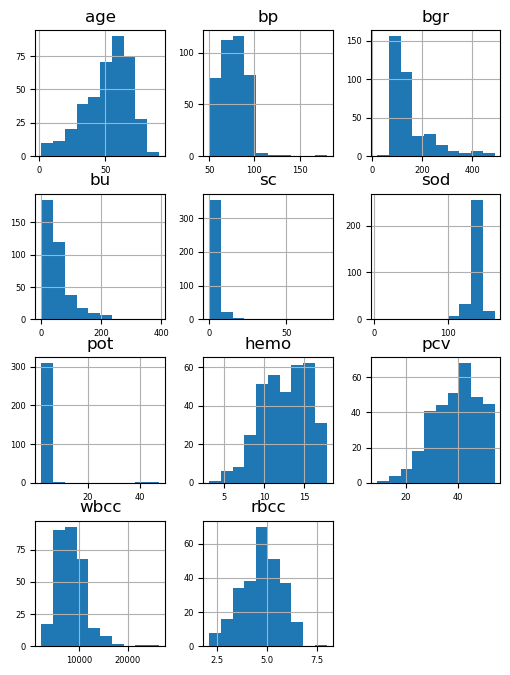

In [11]:
## Check the distribution of each variable
df.hist(xlabelsize=6,ylabelsize=6,figsize=(6,8))